# Assignment 5
This assignment consists of three notebook files. Each exercise is graded using *hidden* tests. If you pass these tests then you are rewarded *full points* for that exercise; if your code fails the tests in any way then you will get *no points* for that exercise. Make sure to **read the rules** before you start the assignment.

## Rules
For this assignment the following rules apply:

**General**
 * The assignment should be completed in **groups of two or three** (enroll in a group on Brightspace).
 * Any kind of intergroup discussion will be considered fraud and both the parties will be punished.
 * All code must be written intra group. All external help, with the exception of Python/library documentation and the lecture slides, will be considered fraud (including generative AI). 
 * Do not use libraries that implement the assignment for you. Ask a TA if you are unsure.

**Grading**
 * Each exercise is graded using additional hidden tests. These tests will check your solution for different (unseen) inputs.
 * If the tests pass without error (warnings are allowed) then you receive full points.
 * If a test cell takes more than five minutes to complete then this is considered an error.
 * Do not make any assumptions on the input data (such as resolution) unless specified otherwise. Doing so may result in the tests failing and thus 0 points.
 * Your grade is computed as $\frac{\text{points}}{\text{max\_points}} * 9 + 1$ and will be rounded to the closest 0.1 point.
 * Submit your code to Brightspace as a zip file containing only the notebook (`*.ipynb`) files.
 * **Do not rename the notebook files**
 
**Late Submissions**
 * Late submissions must be submitted *as soon as possible* to the "Assignment 5 - Late Submissions" assignment on Brightspace.
 * The following penalty will be applied: $\text{adjusted grade} = \text{grade} - 1 - \lceil\frac{\text{minutes late}}{10}\rceil$

<br />
 
**Before you submit**, make sure that you are not accidentaly using any global variables. Restart the kernel (wiping all global variables) and run the code from top to bottom by clicking "Kernel" => "Restart & Run all" in the menu bar at the top.

In [32]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"
sys.path.append("../../")
import helpers
import glm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Exercise 0 (0 points)
This is a group assignment. Every student is expected to contribute to all exercises.

Enter the student IDs of all contributing students:

In [33]:
# YOUR CODE HERE
student_ids = ["1234", "5678"]

In [34]:
# DO NOT REMOVE, MODIFY, OR COPY THIS CELL

# Phong Model
The way that a surface reflects light defines the way that we perceive a material's visual properties. A reflection model is a mathematical function that describes the way that light is reflected by a material. The actual reflectance of light by most surfaces is non trivial but we can get somewhat reasonable results by approximating them with the Phong model.

The Phong model separates the reflection of light in two parts: diffuse and specular reflections. Diffuse reflections scatter the incoming light in all directions resulting in a matte appearance. Specular reflections cause specular highlights (glossy reflections). The Phong model is written as:

$$
C = k_d I (N \cdot L) + k_s I (E \cdot R)^t
$$

Here $C$ is the color reflected towards the observer, $I$ is the color of the incoming light, $L$ is the direction of the incoming light (pointing from the surface towards the light source), $N$ is the surface normal, $E$ is the direction from the surface towards the observer, and $R$ is the light direction $L$ reflected around the surface normal $N$ (see lecture slides for the derivation of $R$). *Both dot products must be clamped to zero to prevent negative values* such as when a light is behind the surface. The appearance of a specific material is modeled with the diffuse reflection color $k_d$, the specular reflectance color $k_s$ and the shininess $t$ which controls the size and intensity of the specular highlight.


### Exercise 1 (1 points)
Implement the Phong model for a given *surface-*, *light-* and *observer* position. You may assume that `surface_normal` is already normalized.

In [35]:
import glm

def phong(kd, ks, t, light_color, surface_normal, surface_position, light_position, observer_position):
    L = glm.normalize(light_position - surface_position)
    E = glm.normalize(observer_position - surface_position)
    R = glm.reflect(-L, surface_normal)
    N_dot_L = max(surface_normal.dot(L), 0)
    E_dot_R = max(E.dot(R), 0)

    diffuse = kd * light_color * N_dot_L
    spec = ks * light_color * (E_dot_R ** t)

    out_color = diffuse + spec
    return out_color


### Tests of exercise 1
We generate an image using the Phong function that you have implemented. Try to move the light and change the $k_d$, $k_s$ and $t$ (do not change `camera_pos`). With the default settings the bunny should appear blue and glossy, with the light situated to the left of the bunny and observer.

*We highly recommend that you write some simple test cases for the `phong(...)` function*. For example: come up with some 2D scenarios which are easy to visualize: does the result match with what you expected?

In [36]:
# Add your own tests here.

In [42]:
positions = helpers.imread_hdr(os.path.join(helpers.dataset_folder, "week5", "position0001.exr"), 0.25, nn_interpolation=True)
normals = helpers.imread_hdr(os.path.join(helpers.dataset_folder, "week5", "normal0001.exr"), 0.25, nn_interpolation=True)
height, width, _ = positions.shape

# We use glm (pip install pyglm) as it is more elegant for 3D math.
# You can use numpy operations on glm vectors (e.g. np.dot(glm.vec3(1,2,3), glm.vec3(4,5,6)) )
observer_pos = glm.vec3(2, -2, 1.5)
light_pos = glm.vec3(-1, -2.5, 2.5)
light_color = glm.vec3(0.8, 0.8, 0.8)

kd = glm.vec3(0.3, 0.5, 0.6)
ks = glm.vec3(0.2, 0.4, 0.9)
t = 5

def create_image(light_pos):
    height, width, _ = positions.shape
    image = np.zeros((height, width, 3))
    for y in range(height):
        for x in range(width):
            if not np.all(normals[y, x] == 0): # Skip background pixels
                image[y, x] = phong(kd, ks, t, light_color, normals[y, x], positions[y, x], light_pos, observer_pos)
    return image

image = create_image(light_pos)
helpers.show_images({ "Colors (Your Solution)": image, "Positions": positions, "Normals": normals / 2 + 0.5 }, ncols=3)
helpers.show_image(np.abs(image), "Colors (Your Solution)") # Larger image

AttributeError: module 'glm' has no attribute 'dot'

In [ ]:
# DO NOT REMOVE, MODIFY, OR COPY THIS CELL


## And there was light!
Now, we will focus on control of the illumination. For an artist, it can be difficult to control the light positions (just look at the credits of any modern movie, there are hundreds of people working on light placements). Our goal is to simplify this work and provide the artist with a tool to efficiently place lights in an indirect manner.

### Exercise 2 (1 point)
Compute a new light position such that the light produces exactly a diffuse shading of zero at the clicked location ($N \cdot L = 0$). There are several possibilities to achieve this goal! You may assume that `surface_normal` is already normalized. Returning `surface_position` is **not** a valid solution.

In [38]:
def compute_new_light_position(surface_normal, surface_position):
    T = glm.vec3(1, 0, 0) if abs(surface_normal.x) < 0.9 else glm.vec3(0, 1, 0)
    L = T - glm.dot(T, surface_normal) * surface_normal
    L = glm.normalize(L)
    distance = 10.0
    new_light_position = surface_position + L * distance

    return new_light_position


### Tests of exercise 2
Click on the bunny in the image below to place the light source. *Modify the code* to verify that your implementation indeed results in $N \cdot L \approx 0$ by adding `assert` statements (`print` statements don't work in an interactive context). Alternatively, you can add tests outside of the interactive visualization.

In [ ]:
# Add  yourn own tests here.

NameError: name 'create_image' is not defined

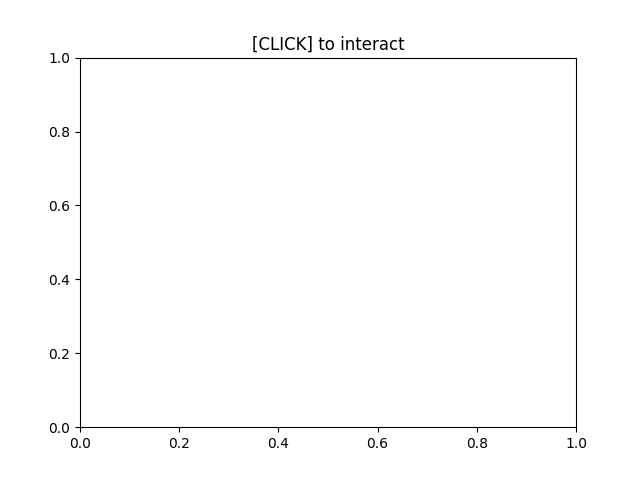

In [41]:
import matplotlib.patches as patches

fig, ax = plt.subplots(1, 1)
ax.set_title("[CLICK] to interact")
imshow = ax.imshow(np.minimum(np.abs(create_image(light_pos)), 1.0))
size=5
circle = patches.Circle((10-size, 10-size), 3, facecolor="red")
ax.add_artist(circle)
ax.axis("off")

interactive_light_pos = glm.vec3(light_pos)
def handle_click(x, y):
    global interactive_light_pos
    if np.dot(normals[y, x], normals[y, x]) == 0:
        return # User clicked on background
    interactive_light_pos = user_interaction_shadow(positions[y, x], normals[y, x], interactive_light_pos)
    
    ###################
    ### MODIFY HERE ###
    ###################
    # Check that N dot L is zero
    N = normals[y, x]
    # ...
    
    circle.center = (x, y)
    imshow.set_data(np.minimum(np.abs(create_image(interactive_light_pos)), 1.0))
    
handle_click(250, 150) # Start by "clicking" on pixel (250, 150). This also ensures that errors are visible.
fig.canvas.mpl_disconnect("button_press_event")
fig.canvas.mpl_connect("button_press_event", lambda e: handle_click(int(e.xdata), int(e.ydata)))

In [ ]:
# DO NOT REMOVE, MODIFY, OR COPY THIS CELL


### Exercise 3 (1 point)
This time, the new light position should be chosen such that the specularity is located exactly at the clicked location when viewed from the current camera position **and** it is at distance $1$ from the surface.
Remember, placing a specularity is not easy because its position depends on the view *and* the light.
You may assume that `surface_normal` is already normalized.

In [ ]:
def user_interaction_specular(surface_position, surface_normal, observer_position):
    # RETURN the new light position such that a specularity (highlight) will be located at surface_position, when viewed from observer_position.
    # Please ensure also that the light is at a distance of 1 from surface_position!
    # There is only ONE way of doing this!
    
    # TODO: Compute a new light position.
    new_light_position = observer_position
    # YOUR CODE HERE
    return new_light_position

### Tests of exercise 3
Click on the bunny in the image below to place the light source. *Modify the code* to verify that your implementation indeed results in maximum specular highlight ($E \cdot R = 1$) by adding `assert` statements. Alternatively, you can add tests outside of the interactive visualization.

In [ ]:
# Add your own tests here.

In [ ]:
def create_image(light_pos):
    height, width, _ = positions.shape
    image = np.zeros((height, width, 3))
    for y in range(height):
        for x in range(width):
            image[y, x] = phong(kd, ks, t, light_color, normals[y, x], positions[y, x], light_pos, observer_pos)
    return image
    
import matplotlib.patches as patches

fig, ax = plt.subplots(1, 1)
ax.set_title("[CLICK] to interact")
imshow = ax.imshow(np.minimum(np.abs(create_image(light_pos)), 1))
size=5
circle = patches.Circle((10-size, 10-size), 3, facecolor="red")
ax.add_artist(circle)
ax.axis("off")

def handle_click(x, y):
    if np.dot(normals[y, x], normals[y, x]) == 0:
        return # User clicked on background
    light_pos = user_interaction_specular(positions[y, x], normals[y, x], observer_pos)
    
    ###################
    ### MODIFY HERE ###
    ###################
    # Check that specular component of Phong is maximal.
    surface_position = positions[y, x]
    surface_normal = normals[y, x]
    #observer_position = glm.vec3(2, -2, 1.5)
    # ...
    
    circle.center = (x, y)
    imshow.set_data(np.minimum(np.abs(create_image(light_pos)), 1))
    
handle_click(250, 150) # Start by "clicking" on pixel (250, 150). This also ensures that errors are visible.
fig.canvas.mpl_disconnect("button_press_event")
fig.canvas.mpl_connect("button_press_event", lambda e: handle_click(int(e.xdata), int(e.ydata)))

In [ ]:
# DO NOT REMOVE, MODIFY, OR COPY THIS CELL
